# Gapminder Data Wrangling and Visualization

### Name: Joseph Willemsz

### Date: April 11, 2022

# Table of Contents

* [Libraries](#libraries)
* [Exercises](#exercises)
    * [Exercise 1](#exercise1)
    * [Exercise 2](#exercise2)
    * [Exercise 3](#exercise3)
* [Data Wrangling From Scratch](#extra_credit)
    * [Exercise 1](#exercise1ec)
    * [Exercise 2](#exercise2ec)
    * [Exercise 3](#exercise3ec)

---
# Libraries <a class="anchor" id="libraries"></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

---
# Exercises <a class="anchor" id="exercises"></a>

## Exercise 1 <a class="anchor" id="exercise1"></a>

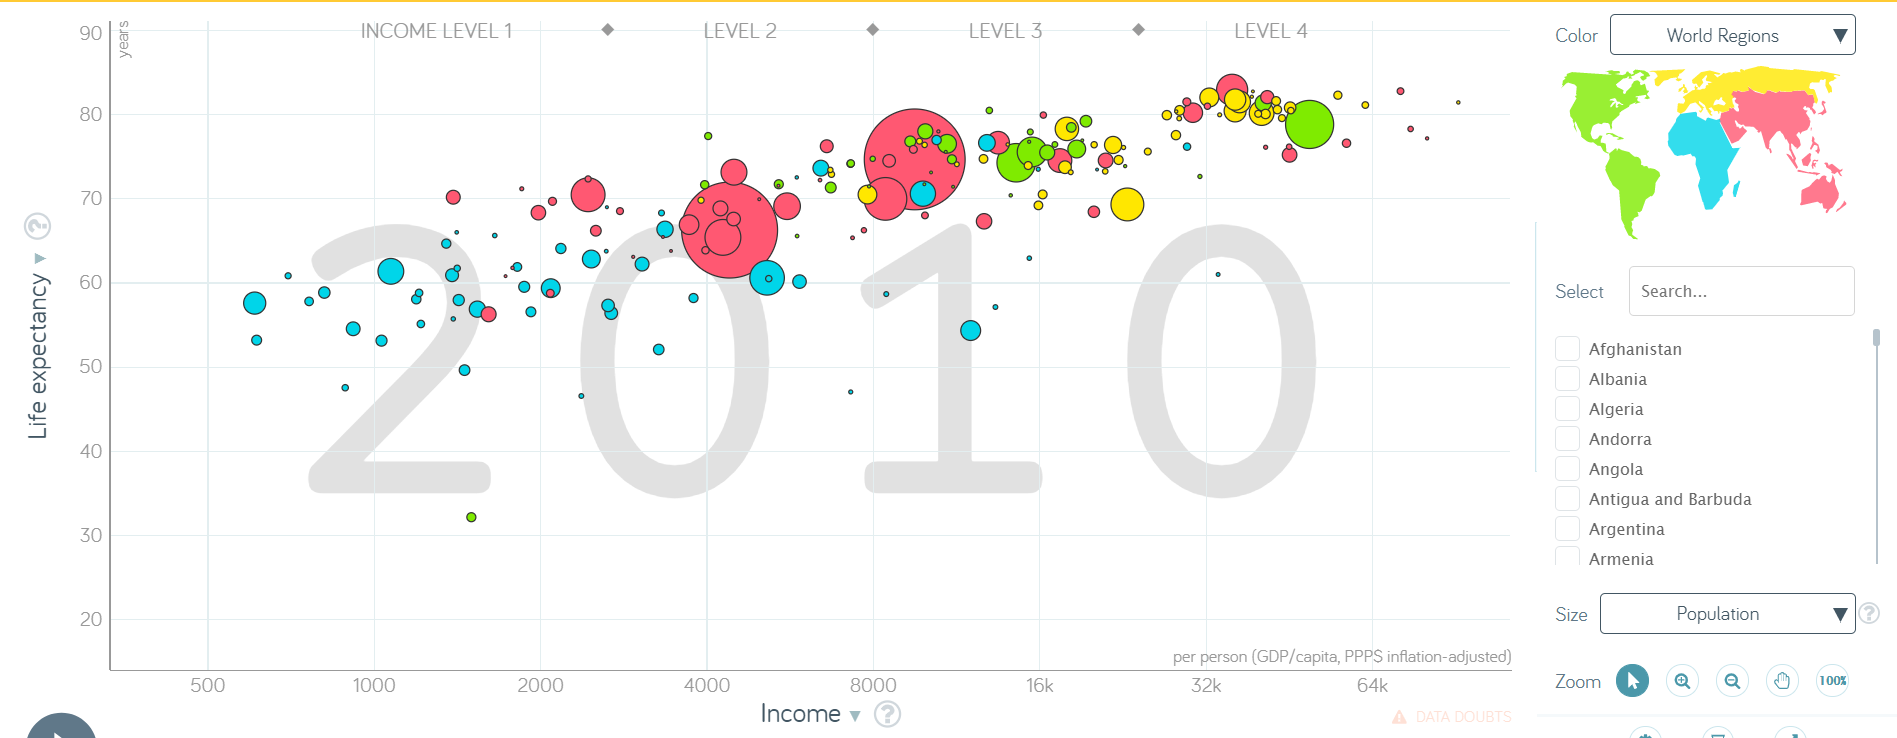

Aesthetics:

- x: Income
- y: Life expectancy
- size: Population
- color: World regions

In [5]:
# data import
q1data = pd.read_csv("Data/q1data.csv")

In [6]:
# custom color palette
palette = {"asia":"tomato",
           "africa":"lightblue", 
           "americas":"limegreen",
           "europe":"yellow"}

[Text(500, 0, '500'),
 Text(1000, 0, '1000'),
 Text(2000, 0, '2k'),
 Text(4000, 0, '4k'),
 Text(8000, 0, '8k'),
 Text(16000, 0, '16k'),
 Text(32000, 0, '32k'),
 Text(64000, 0, '64k')]

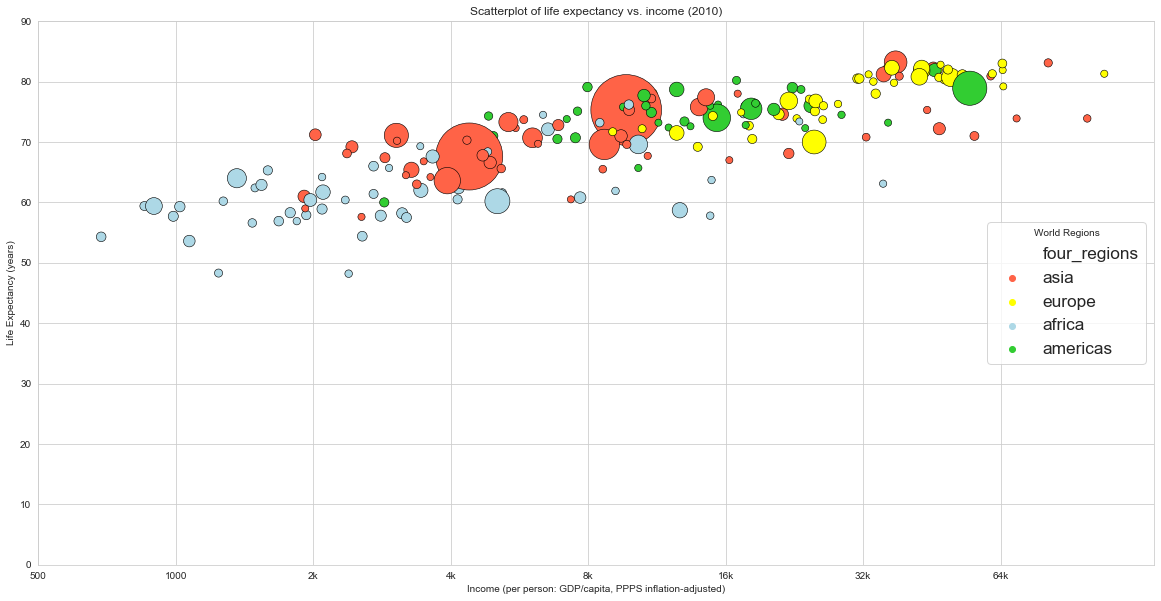

In [8]:
# specify plot size
plt.figure(figsize=(20, 10))

# plot
p1 = sns.scatterplot(data = q1data, 
                     x = "income", 
                     y = "life_exp", 
                     size = "population", 
                     hue = "four_regions", 
                     sizes = (50, 5000), 
                     edgecolor = "black",
                     palette = palette)

# labels and axes limits
p1.set(xlabel = "Income (per person: GDP/capita, PPPS inflation-adjusted)", 
       ylabel = "Life Expectancy (years)", 
       title = "Scatterplot of life expectancy vs. income (2010)",
       xscale = "log",
       ylim = (0, 90))

# set background theme
sns.set_style("whitegrid")

# editing legend
h,l = p1.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5], 
           loc = 5, 
           fontsize = "xx-large", 
           title = "World Regions")

# custom axis tick marks
p1.set_xticks([500, 1000, 2000, 4000, 8000, 16000, 32000, 64000])
p1.set_xticklabels(['500', '1000', '2k', '4k', '8k', '16k', '32k', '64k'])

## Exercise 2 <a class="anchor" id="exercise2"></a>

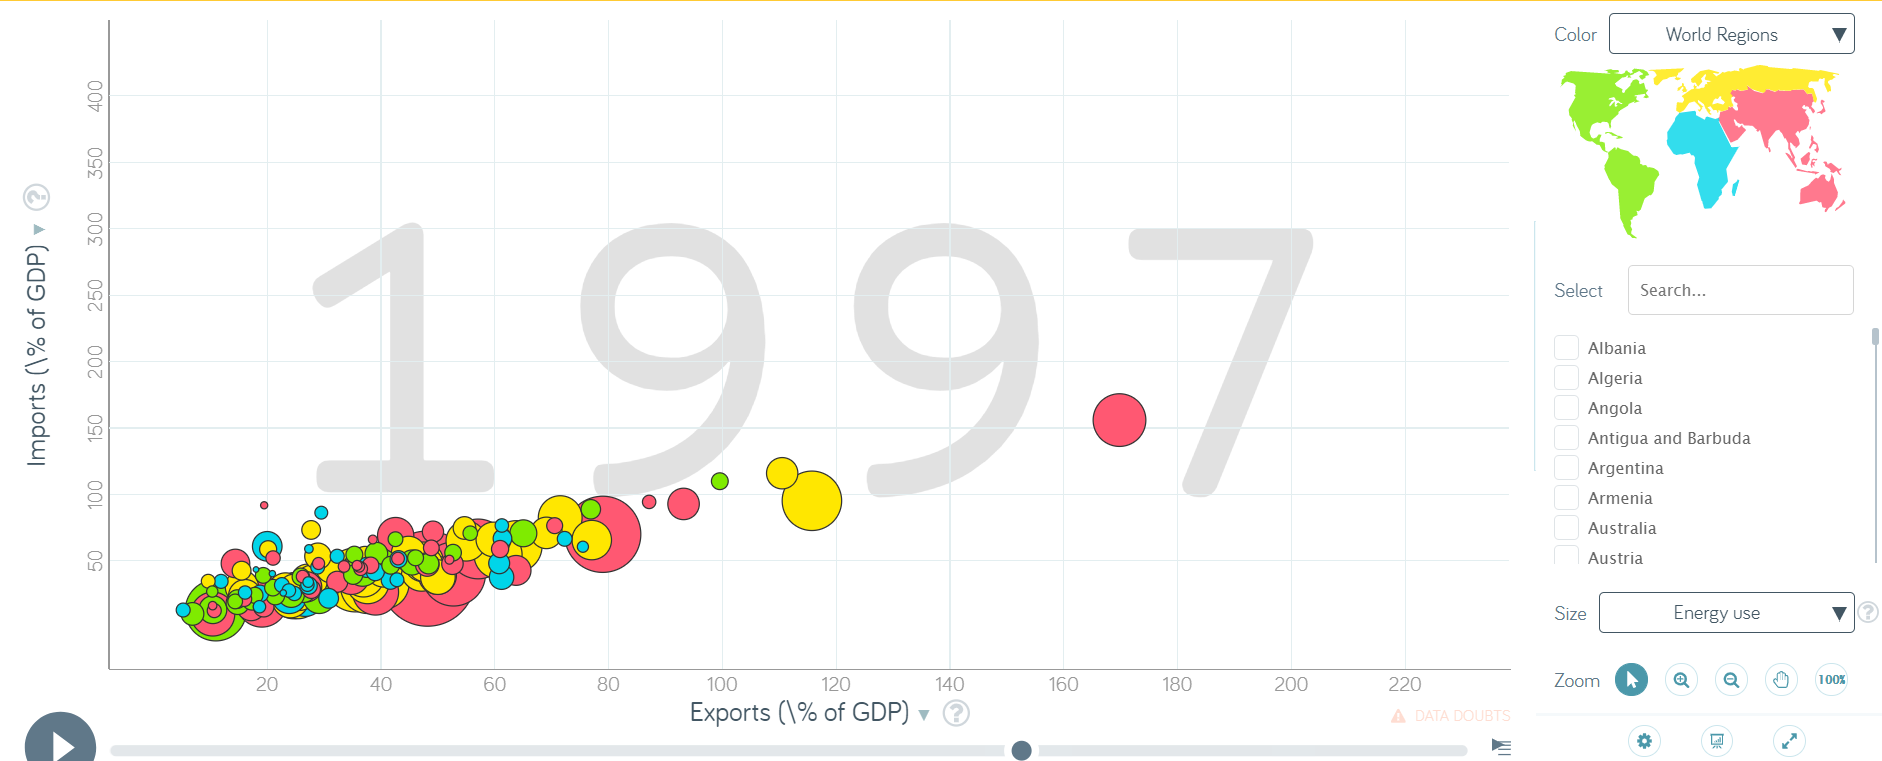

Aesthetics:

- x: Exports
- y: Imports
- size: Energy use
- color: World regions

In [55]:
# data import and remove NAs
q2data = pd.read_csv("Data/q2data.csv")
q2data.dropna(inplace=True)

The `energy` variable is a string data type and needs to be converted to a float. However we must change the instances where "k" appears in "13.1k" to 13100. The custom function, `remove_k()` does the job.

In [11]:
def remove_k(string):
    if "k" in string:
        string = float(string.replace("k", "")) * 1000
        return string
    else: 
        string = float(string)
        return string

In [12]:
q2data["energy"] = q2data["energy"].apply(remove_k)

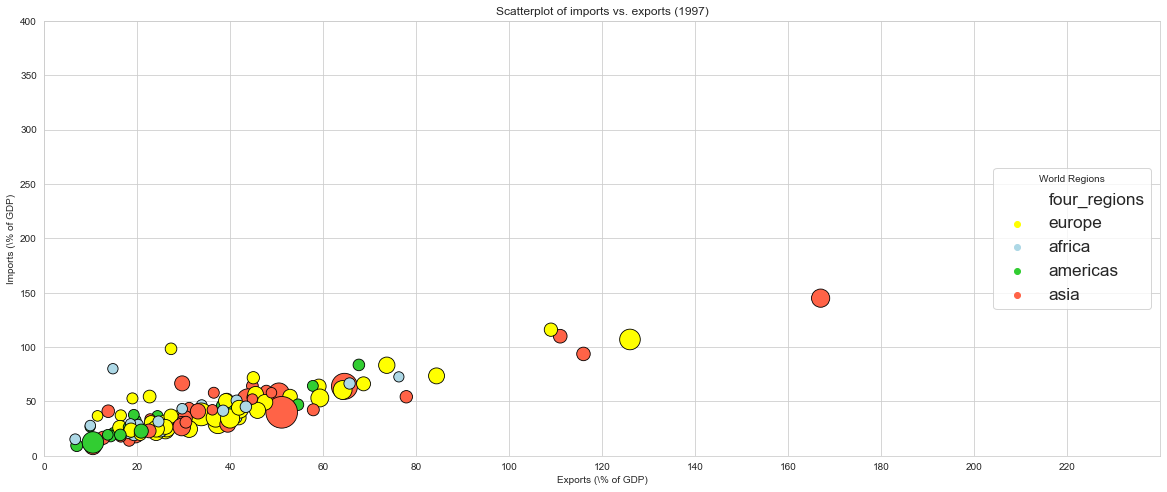

In [13]:
# specify plot size
plt.figure(figsize=(20, 8))

# plot
p2 = sns.scatterplot(data = q2data, 
                     x = "exports", 
                     y = "imports", 
                     hue = "four_regions", 
                     size = "energy", 
                     sizes = (100, 1000), 
                     edgecolor = "black", 
                     palette = palette)

# labels and axes limits
p2.set(xlabel = "Exports (\% of GDP)", 
       ylabel = "Imports (\% of GDP)", 
       title = "Scatterplot of imports vs. exports (1997)",
       xlim = (0, 240),
       ylim = (0, 400))

# custom tick marks x-axis
p2.set_xticks(np.linspace(0, 220, 12))

# add plot gridlines
sns.set_style("whitegrid")

# edit legend
h,l = p2.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5], 
           loc = 5, 
           fontsize = "xx-large", 
           title = "World Regions")

## Exercise 3 <a class="anchor" id="exercise3"></a>

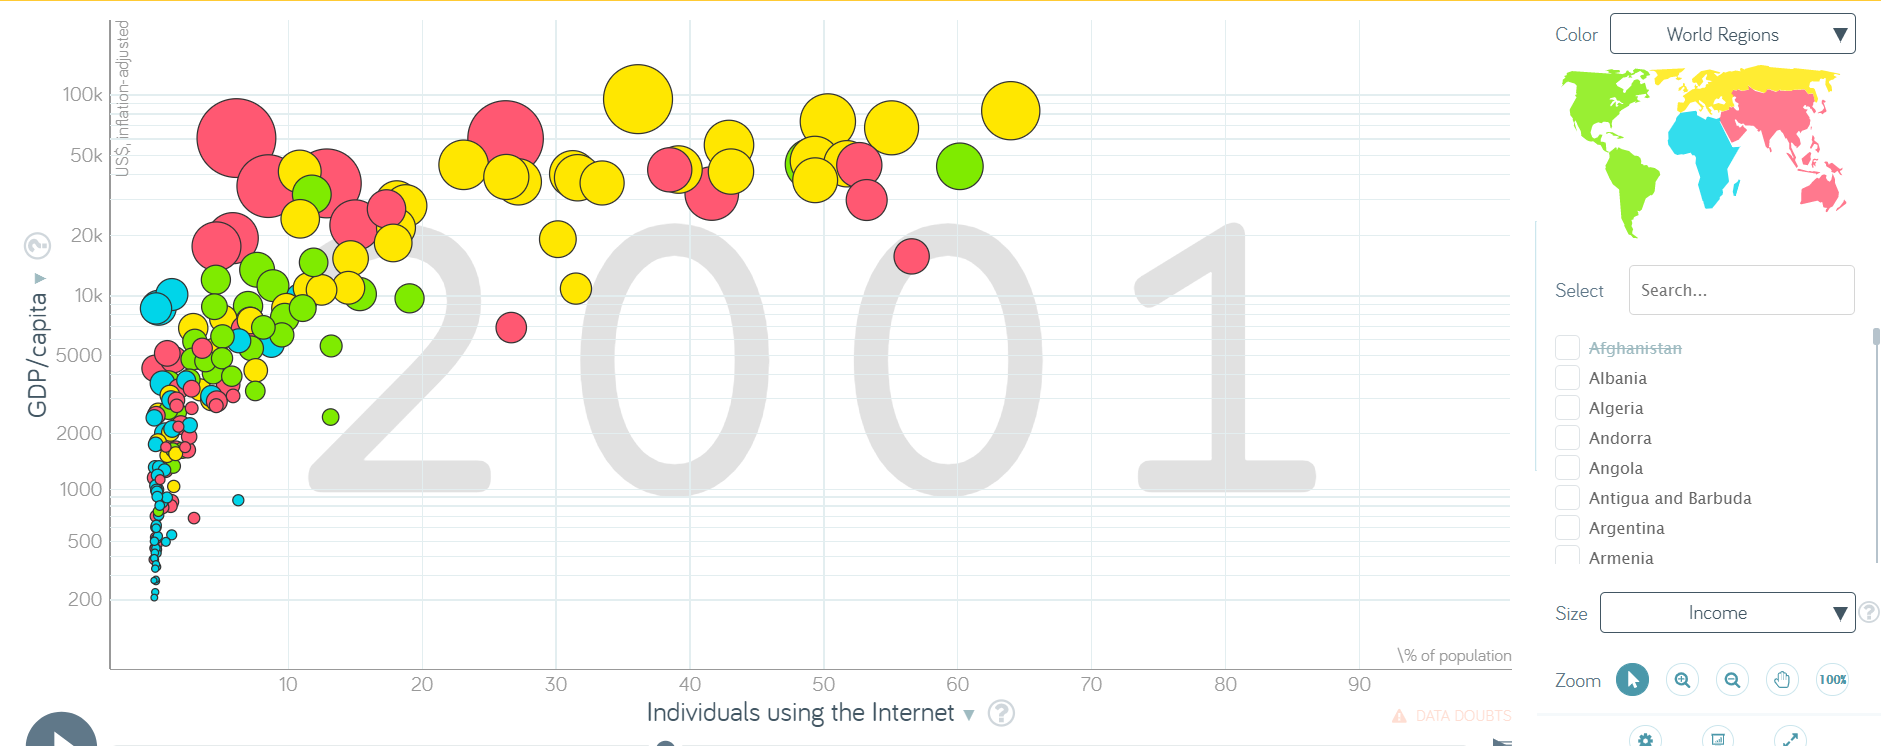

Aesthetics:

- x: Internet Use
- y: GDP/capita
- size: Income
- color: World regions

In [56]:
# data import
q3data = pd.read_csv("Data/q3data.csv")

[Text(0, 200, '200'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 2000, '2000'),
 Text(0, 5000, '50000'),
 Text(0, 10000, '10k'),
 Text(0, 20000, '20k'),
 Text(0, 50000, '50k'),
 Text(0, 100000, '100k')]

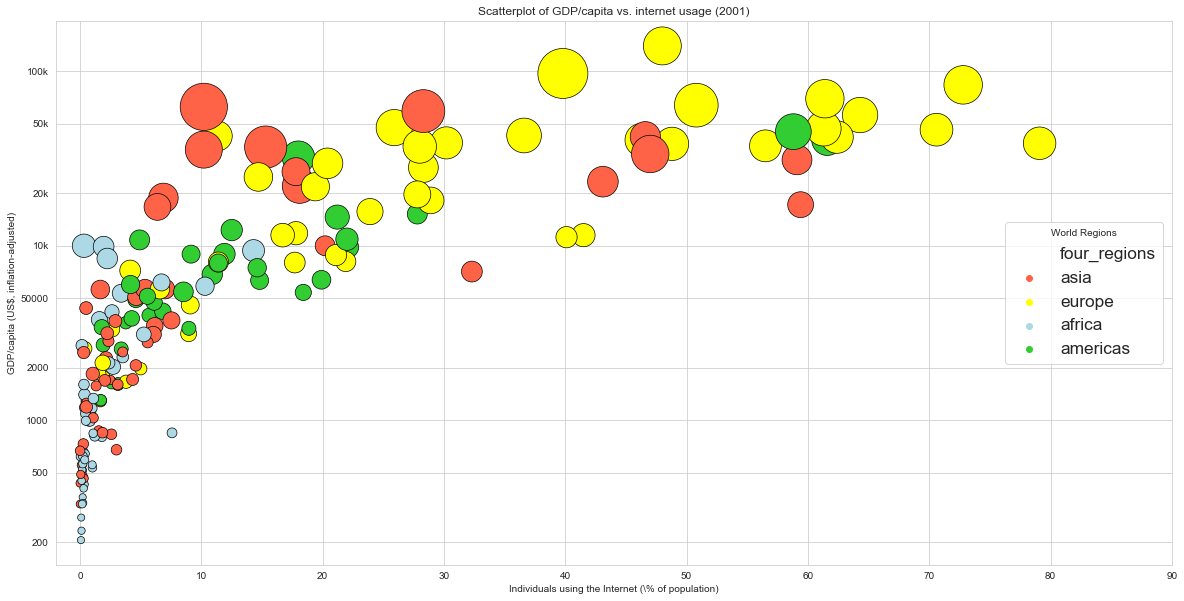

In [15]:
# specify plot size
plt.figure(figsize=(20, 10))

# plot
p3 = sns.scatterplot(data = q3data, 
                     x = "internet_users", 
                     y = "gdp", 
                     hue = "four_regions", 
                     size = "income", 
                     sizes = (50, 2500), 
                     edgecolor = "black", 
                     palette = palette)

# labels and axes limits
p3.set(xlabel = "Individuals using the Internet (\% of population)", 
       ylabel = "GDP/capita (US$, inflation-adjusted)", 
       title = "Scatterplot of GDP/capita vs. internet usage (2001)",
       yscale = "log", 
       xlim = (-2, 90))

# plot theme
sns.set_style("whitegrid")

# legend settings
h,l = p3.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5], 
           loc = 5, 
           fontsize = "xx-large", 
           title = "World Regions")

# custom axis tick marks
p3.set_xticks(np.linspace(0, 90, 10))
p3.set_xticklabels(['0', '10', '20', '30', '40', '50', '60','70', '80', '90'])
p3.set_yticks([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])
p3.set_yticklabels(['200', '500', '1000', '2000', '50000', '10k', '20k', '50k', '100k'])

In [16]:
del [q1data, q2data, q3data]

---
# Data Wrangling From Scratch <a class="anchor" id="extra_credit"></a>

## Exercise 1 <a class="anchor" id="exercise1ec"></a>

In [23]:
# data import
income_data = pd.read_csv("Data/gapminder_income_data.csv")
life_exp_data = pd.read_csv("Data/gapminder_life_exp_data.csv")
population_data = pd.read_csv("Data/gapminder_population_data.csv")
region_data = pd.read_csv("Data/gapminder_region_data.csv")[["name", "four_regions"]]

In [24]:
# converting dataframe from wide to long format
income_data = pd.melt(income_data, id_vars = ["country"], var_name = "year", value_name = "income")
life_exp_data = pd.melt(life_exp_data, id_vars = ["country"], var_name = "year", value_name = "life_exp")
population_data = pd.melt(population_data, id_vars = ["country"], var_name = "year", value_name = "population")

In [25]:
# renaming region_data column
region_data.rename(columns = {'name':'country'}, inplace = True)

In [26]:
# joining all gapminder data frames together
q1data = pd.merge(pd.merge(pd.merge(population_data, life_exp_data, on=["country", "year"]), 
                                       income_data, on=["country", "year"]), 
                                          region_data, on="country")
q1data.dropna(inplace = True)

In [27]:
# convert year to integer data type
q1data["year"] = q1data["year"].apply(pd.to_numeric)

In [29]:
# read q1data to csv the same csv to avoid an error, not sure why this works 
q1data.to_csv("Data/q1data2.csv")
q1data = pd.read_csv("Data/q1data2.csv")

In the  `q1data` data frame, we see that `income` is a string variable. There is "k" in some instances meaning 1000. We need to change these instances where income = "13.1k" to 13100.

In [31]:
# change income variable to numeric and 11.1k to 11,100
q1data.income = q1data.income.apply(remove_k)

In [32]:
q1data = q1data[q1data["year"] == 2010]
q1data.head()

,Unnamed: 0,country,year,population,life_exp,income,four_regions
210,210,Afghanistan,2010,29200000,61.0,1910.0,asia
460,460,Albania,2010,2950000,78.1,11100.0,europe
710,710,Algeria,2010,36000000,74.7,11100.0,africa
811,960,Andorra,2010,84500,81.9,46900.0,europe
1030,1210,Angola,2010,23400000,60.8,7680.0,africa


In [33]:
# custom color palette
palette = {"asia":"tomato",
           "africa":"lightblue", 
           "americas":"limegreen",
           "europe":"yellow"}

[Text(500, 0, '500'),
 Text(1000, 0, '1000'),
 Text(2000, 0, '2k'),
 Text(4000, 0, '4k'),
 Text(8000, 0, '8k'),
 Text(16000, 0, '16k'),
 Text(32000, 0, '32k'),
 Text(64000, 0, '64k')]

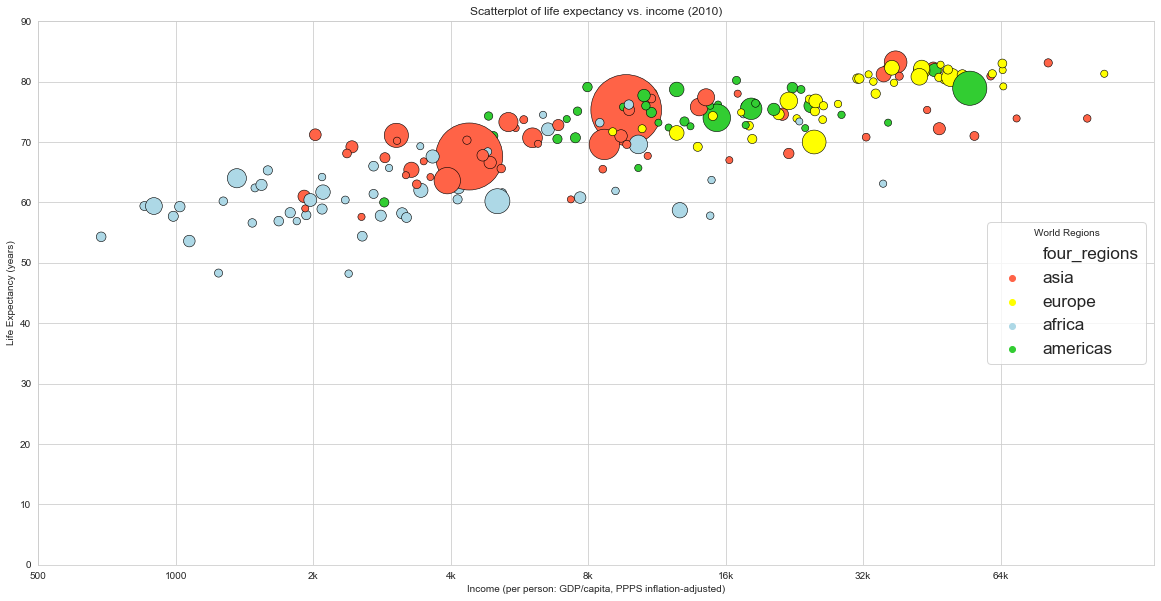

In [34]:
# specify plot size
plt.figure(figsize=(20, 10))

p1 = sns.scatterplot(data = q1data[q1data["year"] == 2010], 
                     x = "income", 
                     y = "life_exp", 
                     size = "population", 
                     hue = "four_regions", 
                     sizes = (50, 5000), 
                     edgecolor = "black",
                     palette = palette)

p1.set(xlabel = "Income (per person: GDP/capita, PPPS inflation-adjusted)", 
       ylabel = "Life Expectancy (years)", 
       title = "Scatterplot of life expectancy vs. income (2010)",
       xscale = "log",
       ylim = (0, 90))

# set background theme
sns.set_style("whitegrid")

# editing legend
h,l = p1.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5], 
           loc = 5, 
           fontsize = "xx-large", 
           title = "World Regions")

# custom axis tick marks
p1.set_xticks([500, 1000, 2000, 4000, 8000, 16000, 32000, 64000])
p1.set_xticklabels(['500', '1000', '2k', '4k', '8k', '16k', '32k', '64k'])

## Exercise 2 <a class="anchor" id="exercise2ec"></a>

In [35]:
# data import
imports_data = pd.read_csv("Data/gapminder_imports_data.csv")
exports_data = pd.read_csv("Data/gapminder_exports_data.csv")
energy_data = pd.read_csv("Data/gapminder_energy_data.csv")

In [36]:
# converting dataframe from wide to long format
imports_data = pd.melt(imports_data, id_vars = ["country"], var_name = "year", value_name = "imports")
exports_data = pd.melt(exports_data, id_vars = ["country"], var_name = "year", value_name = "exports")
energy_data = pd.melt(energy_data, id_vars = ["country"], var_name = "year", value_name = "energy")

In [37]:
# joining all gapminder dataframes together
q2data = pd.merge(pd.merge(pd.merge(imports_data, exports_data, on=["country", "year"]), 
                                  energy_data, on=["country", "year"]), 
                                      region_data, on = "country")
q2data.dropna(inplace=True)

In [38]:
# convert year to integer data type
q2data["year"] = q2data["year"].apply(pd.to_numeric)

In [40]:
q2data = q2data[q2data["year"] == 1997]
q2data.head()

,country,year,imports,exports,energy,four_regions
93,Albania,1997,36.7,11.5,385.0,europe
205,Argentina,1997,12.9,10.4,1620.0,americas
261,Armenia,1997,52.8,19.0,594.0,europe
373,Australia,1997,20.5,19.6,5470.0,asia
429,Austria,1997,38.6,38.4,3550.0,europe


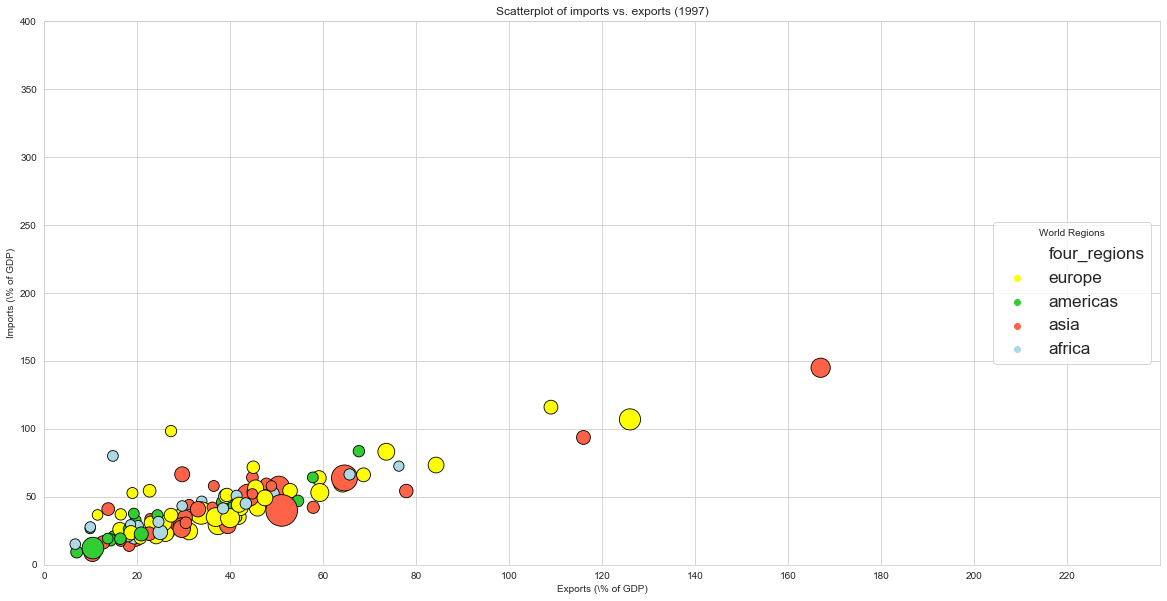

In [41]:
# specify plot size
plt.figure(figsize=(20, 10))

p2 = sns.scatterplot(data = q2data, 
                     x = "exports", 
                     y = "imports", 
                     hue = "four_regions", 
                     size = "energy", 
                     sizes = (100, 1000), 
                     edgecolor = "black", 
                     palette = palette)

p2.set(xlabel = "Exports (\% of GDP)", 
       ylabel = "Imports (\% of GDP)", 
       title = "Scatterplot of imports vs. exports (1997)",
       xlim = (0, 240),
       ylim = (0, 400))

# custom tick marks x-axis
p2.set_xticks(np.linspace(0, 220, 12))

# add plot gridlines
sns.set_style("whitegrid")

# edit legend
h,l = p2.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5], 
           loc = 5, 
           fontsize = "xx-large", 
           title = "World Regions")

## Exercise 3 <a class="anchor" id="exercise3ec"></a>

In [42]:
# data import
gdpcapita_data = pd.read_csv("Data/gapminder_gdpcapita_data.csv")
internet_data = pd.read_csv("Data/gapminder_internet_users_data.csv")
income_data = pd.read_csv("Data/gapminder_income_data.csv")
region_data = pd.read_csv("Data/gapminder_region_data.csv")[["name", "four_regions"]]

In [43]:
# converting dataframe from wide to long format
gdpcapita_data = pd.melt(gdpcapita_data, id_vars = ["country"], var_name = "year", value_name = "gdp")
internet_users_data = pd.melt(internet_data, id_vars = ["country"], var_name = "year", value_name = "internet_users")
income_data = pd.melt(income_data, id_vars = ["country"], var_name = "year", value_name = "income")

In [44]:
# renaming region_data column
region_data.rename(columns = {'name':'country'}, inplace = True)

In [45]:
# joining all gapminder dataframes together
q3data = pd.merge(pd.merge(pd.merge(gdpcapita_data, internet_users_data, on=["country", "year"]), 
                                  income_data, on=["country", "year"]), 
                                      region_data, on = "country")

In [46]:
# convert year to integer data type
q3data["year"] = q3data["year"].apply(pd.to_numeric)

In the  `q1data` data frame, we see that `income` is a string variable. There is "k" in some instances meaning 1000. We need to change these instances where income = "13.1k" to 13100.

In [47]:
# change income variable to numeric and 11.1k to 11,100
q3data["income"] = q3data["income"].apply(remove_k)

In [48]:
q3data = q3data[q3data["year"] == 2001]

[Text(0, 200, '200'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 2000, '2000'),
 Text(0, 5000, '50000'),
 Text(0, 10000, '10k'),
 Text(0, 20000, '20k'),
 Text(0, 50000, '50k'),
 Text(0, 100000, '100k')]

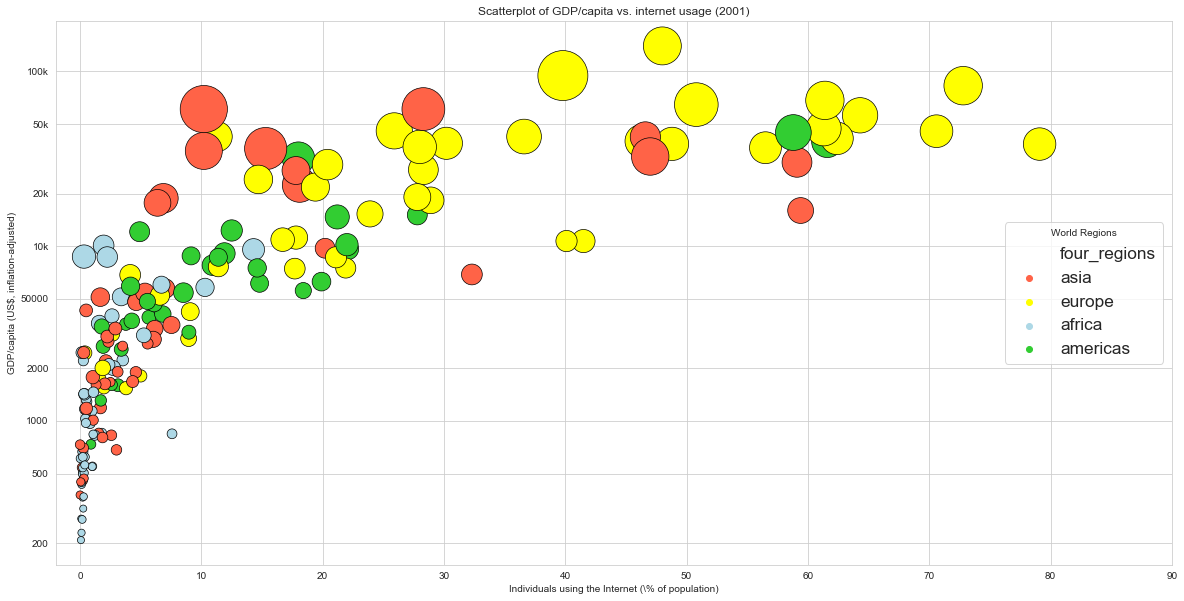

In [49]:
# specify plot size
plt.figure(figsize=(20, 10))

p3 = sns.scatterplot(data = q3data, 
                     x = "internet_users", 
                     y = "gdp", 
                     hue = "four_regions", 
                     size = "income", 
                     sizes = (50, 2500), 
                     edgecolor = "black", 
                     palette = palette)

p3.set(xlabel = "Individuals using the Internet (\% of population)", 
       ylabel = "GDP/capita (US$, inflation-adjusted)", 
       title = "Scatterplot of GDP/capita vs. internet usage (2001)",
       yscale = "log", 
       xlim = (-2, 90))

sns.set_style("whitegrid")

h,l = p3.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5], 
           loc = 5, 
           fontsize = "xx-large", 
           title = "World Regions")

# custom axis tick marks
p3.set_xticks(np.linspace(0, 90, 10))
p3.set_xticklabels(['0', '10', '20', '30', '40', '50', '60','70', '80', '90'])
p3.set_yticks([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])
p3.set_yticklabels(['200', '500', '1000', '2000', '50000', '10k', '20k', '50k', '100k'])